In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_excel('G:/Stuff/data_akbilgic.xlsx',header=1)

In [11]:
df.head()

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [7]:
df.shape

(536, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     536 non-null    datetime64[ns]
 1   ISE      536 non-null    float64       
 2   ISE.1    536 non-null    float64       
 3   SP       536 non-null    float64       
 4   DAX      536 non-null    float64       
 5   FTSE     536 non-null    float64       
 6   NIKKEI   536 non-null    float64       
 7   BOVESPA  536 non-null    float64       
 8   EU       536 non-null    float64       
 9   EM       536 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 42.0 KB


In [15]:
df.set_index('date',inplace=True)

In [19]:
df['ISE'].resample('Y').mean()

date
2009-12-31    0.002684
2010-12-31    0.000895
2011-12-31   -0.000557
Freq: A-DEC, Name: ISE, dtype: float64

In [24]:
df.columns

Index(['ISE', 'ISE.1', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')

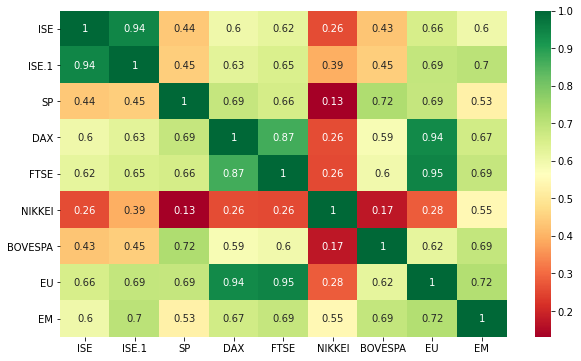

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

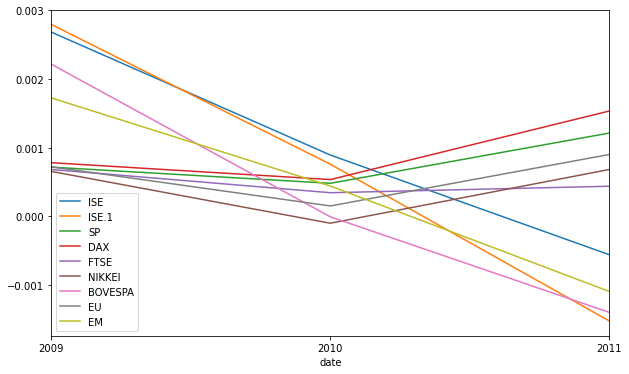

In [29]:
df[['ISE', 'ISE.1', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].resample('Y').mean().plot(figsize=(10,6))

In [30]:
X=df.drop('ISE',axis=1)
Y=df['ISE']

In [31]:
X.shape,Y.shape

((536, 8), (536,))

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.25)

In [37]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lasso=Lasso(alpha=100)
lasso.fit(x_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
ridge=Ridge(alpha=0.001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [40]:
SVM=SVR()
SVM.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
LR.score(x_test,y_test)*100

91.30985840468396

In [59]:
lasso.score(x_test,y_test)*100

-0.454690631092336

In [67]:
ridge.score(x_test,y_test)*100

91.36399369818517

In [42]:
RF.score(x_test,y_test)*100

87.39608143653305

In [43]:
XGB.score(x_test,y_test)*100

87.42251566715214

In [44]:
SVM.score(x_test,y_test)*100

-19.01013220839378

In [75]:
print(LR.score(x_train,y_train)*100)
print(RF.score(x_train,y_train)*100)
print(XGB.score(x_train,y_train)*100)
print(lasso.score(x_train,y_train)*100)
print(ridge.score(x_train,y_train)*100)
print(SVM.score(x_train,y_train)*100)

90.62418790037302
98.18820024043383
99.67042187606899
0.0
90.60113203858681
-16.651015825688532


In [68]:
y_pred_LR=LR.predict(x_test)
y_pred_lasso=lasso.predict(x_test)
y_pred_ridge=ridge.predict(x_test)
y_pred_RF=RF.predict(x_test)
y_pred_XGB=XGB.predict(x_test)
y_pred_SVM=SVM.predict(x_test)

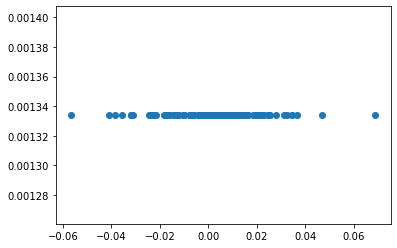

In [61]:
plt.scatter(y_test,y_pred_lasso)

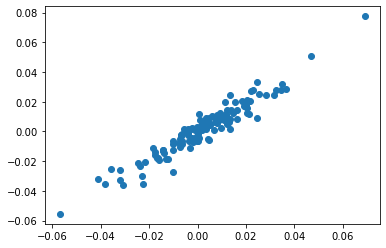

In [69]:
plt.scatter(y_test,y_pred_ridge)

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(y_test,y_pred_ridge)

2.6429567894975136e-05

In [72]:
mean_squared_error(y_test,y_pred_LR)

2.659524313479099e-05

In [73]:
mean_squared_error(y_test,y_pred_lasso)

0.0003074307699202625

In [77]:
from sklearn.externals import joblib

In [79]:
joblib.dump(ridge,'G:/Stuff/ISE_ridge.pkl')

['G:/Stuff/ISE_ridge.pkl']

In [81]:
ISE_ridge =joblib.load('G:/Stuff/ISE_ridge.pkl')

In [82]:
ISE_ridge.score(x_test,y_test)*100

91.36399369818517

In [83]:
ISE_ridge.score(x_train,y_train)*100

90.60113203858681